In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pymongo
import sys
import json
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
import os
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('Motor_vehicle_insurance_data.csv',sep=';')
for col in df.columns:
    if df[col].isnull().sum()>0:
        print(f"Column {col} has {df[col].isnull().sum()} null values")

Column Date_lapse has 70408 null values
Column Type_fuel has 1764 null values
Column Length has 10329 null values


C:\Users\joshi\AppData\Local\Temp\ipykernel_12760\2482879030.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Motor_vehicle_insurance_data.csv',sep=';')


In [ ]:
df['Length']=df['Length'].fillna(df['Length'].mean())
df['Type_fuel']=df['Type_fuel'].fillna(df['Type_fuel'].mode()[0])

In [ ]:
df.shape

(105555, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    105555 non-null  int64  
 1   Date_start_contract   105555 non-null  object 
 2   Date_last_renewal     105555 non-null  object 
 3   Date_next_renewal     105555 non-null  object 
 4   Date_birth            105555 non-null  object 
 5   Date_driving_licence  105555 non-null  object 
 6   Distribution_channel  105555 non-null  object 
 7   Seniority             105555 non-null  int64  
 8   Policies_in_force     105555 non-null  int64  
 9   Max_policies          105555 non-null  int64  
 10  Max_products          105555 non-null  int64  
 11  Lapse                 105555 non-null  int64  
 12  Date_lapse            35147 non-null   object 
 13  Payment               105555 non-null  int64  
 14  Premium               105555 non-null  float64
 15  

In [ ]:
int_cat=[]
float_cat=[]
object_cat=[]
for col in df.columns:
    if df[col].dtype=='int64':
        int_cat.append(col)
    elif df[col].dtype=='float64':
        float_cat.append(col)
    elif df[col].dtype=='object':
        object_cat.append(col)
        
boolean_cat = []
categorical_cat = []
for col in object_cat:
    # Check if all non-null values are boolean
    if df[col].isin([True, False]).all():
        boolean_cat.append(col)
    else:
        categorical_cat.append(col)
            

In [ ]:
target1=df['Cost_claims_year']
df.drop(columns=['Cost_claims_year','ID','R_Claims_history'],inplace=True)
target2=df['Premium']
df.drop(columns=['Premium'],inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, target1, test_size=0.2, random_state=42)
X_train,X_test,y_train2,y_test2=train_test_split(df,target2,test_size=0.2,random_state=42)

Error: 'Motor vehicle insurance data.csv' not found. Please ensure the file is in the correct directory.
Data Head:
   ID Date_start_contract Date_last_renewal Date_next_renewal  Date_birth  \
0   1          05/11/2015        05/11/2015        05/11/2016  15/04/1956   
1   1          05/11/2015        05/11/2016        05/11/2017  15/04/1956   
2   1          05/11/2015        05/11/2017        05/11/2018  15/04/1956   
3   1          05/11/2015        05/11/2018        05/11/2019  15/04/1956   
4   2          26/09/2017        26/09/2017        26/09/2018  15/04/1956   

  Date_driving_licence Distribution_channel  Seniority  Policies_in_force  \
0           20/03/1976                    0          4                  1   
1           20/03/1976                    0          4                  1   
2           20/03/1976                    0          4                  2   
3           20/03/1976                    0          4                  2   
4           20/03/1976              

[I 2025-07-17 18:42:19,710] A new study created in memory with name: no-name-28420177-8bd2-4bf2-9ee0-51153611bc6f
[I 2025-07-17 18:42:27,411] Trial 0 finished with value: 43.43292717413694 and parameters: {'n_estimators': 1500, 'learning_rate': 0.05387724847201495, 'max_depth': 7, 'subsample': 0.9448508859452068, 'colsample_bytree': 0.769144757730305, 'gamma': 3.7853193602808153, 'lambda': 2.6365216979369, 'alpha': 4.5261279214396115}. Best is trial 0 with value: 43.43292717413694.
[I 2025-07-17 18:42:37,266] Trial 1 finished with value: 61.2897593154234 and parameters: {'n_estimators': 1700, 'learning_rate': 0.01674626980487218, 'max_depth': 7, 'subsample': 0.6214826315713353, 'colsample_bytree': 0.777186240975592, 'gamma': 0.8889240739076171, 'lambda': 5.4686218598731795, 'alpha': 0.7970124798100148}. Best is trial 0 with value: 43.43292717413694.
[I 2025-07-17 18:42:39,524] Trial 2 finished with value: 85.92102017947576 and parameters: {'n_estimators': 600, 'learning_rate': 0.013120


Best trial for XGB:
  Value (RMSE): 1.0775530193928615
  Params: 
    n_estimators: 2000
    learning_rate: 0.15152142839571633
    max_depth: 10
    subsample: 0.6948974639322683
    colsample_bytree: 0.6128830901198487
    gamma: 2.524726500297269
    lambda: 8.028634341227857
    alpha: 1.426465919270584


[I 2025-07-17 18:45:33,700] A new study created in memory with name: no-name-8677a244-fdbc-4809-9073-af29ed0ce26b


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 316.178243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 18:45:42,892] Trial 0 finished with value: 19.941977282341984 and parameters: {'n_estimators': 1900, 'learning_rate': 0.16608620674124086, 'num_leaves': 74, 'max_depth': 11, 'subsample': 0.9407536927049182, 'colsample_bytree': 0.7941666459893129, 'reg_alpha': 0.5749268194744035, 'reg_lambda': 0.06674920525995143}. Best is trial 0 with value: 19.941977282341984.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 316.178243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 18:45:51,117] Trial 1 finished with value: 33.06192745150627 and parameters: {'n_estimators': 2000, 'learning_rate': 0.15044200339839, 'num_leaves': 47, 'max_depth': 8, 'subsample': 0.817205925789118, 'colsample_bytree': 0.6743689765845626, 'reg_alpha': 0.8889141308173271, 'reg_lambda': 0.4913133858679076}. Best is trial 0 with value: 19.941977282341984.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 316.178243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 18:45:58,669] Trial 2 finished with value: 52.32440831424385 and parameters: {'n_estimators': 1700, 'learning_rate': 0.08452476023207872, 'num_leaves': 241, 'max_depth': 6, 'subsample': 0.6458339741721321, 'colsample_bytree': 0.8810271279014974, 'reg_alpha': 0.09048511470221221, 'reg_lambda': 0.9851326687485198}. Best is trial 0 with value: 19.941977282341984.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 316.178243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 18:46:01,267] Trial 3 finished with value: 69.41107707473626 and parameters: {'n_estimators': 400, 'learning_rate': 0.04242374880288981, 'num_leaves': 135, 'max_depth': 7, 'subsample': 0.9040288434086283, 'colsample_bytree': 0.6519013381723773, 'reg_alpha': 0.8769407705759624, 'reg_lambda': 0.231740941088864}. Best is trial 0 with value: 19.941977282341984.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 316.178243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 18:46:03,120] Trial 4 finished with value: 56.20748441230309 and parameters: {'n_estimators': 300, 'learning_rate': 0.2282163745280378, 'num_leaves': 260, 'max_depth': 7, 'subsample': 0.7659498720413644, 'colsample_bytree': 0.7600487233600758, 'reg_alpha': 0.8985863683881617, 'reg_lambda': 0.09187596308494461}. Best is trial 0 with value: 19.941977282341984.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 316.178243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 18:46:05,931] Trial 5 finished with value: 51.85714532944251 and parameters: {'n_estimators': 600, 'learning_rate': 0.25076866836043316, 'num_leaves': 66, 'max_depth': 6, 'subsample': 0.8823755496976144, 'colsample_bytree': 0.8732414867689329, 'reg_alpha': 0.7355211820267703, 'reg_lambda': 0.7259907785483515}. Best is trial 0 with value: 19.941977282341984.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 316.178243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 18:46:10,665] Trial 6 finished with value: 54.752580299629905 and parameters: {'n_estimators': 1300, 'learning_rate': 0.18232033230160163, 'num_leaves': 40, 'max_depth': 5, 'subsample': 0.9983617094409696, 'colsample_bytree': 0.634485662972582, 'reg_alpha': 0.06241202687675318, 'reg_lambda': 0.19427669999418917}. Best is trial 0 with value: 19.941977282341984.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 316.178243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 18:46:12,700] Trial 7 finished with value: 50.83068613511329 and parameters: {'n_estimators': 200, 'learning_rate': 0.16501593652562208, 'num_leaves': 240, 'max_depth': 10, 'subsample': 0.665878435120906, 'colsample_bytree': 0.6703053065469006, 'reg_alpha': 0.13532818006727598, 'reg_lambda': 0.301531553451028}. Best is trial 0 with value: 19.941977282341984.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 316.178243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 18:46:26,654] Trial 8 finished with value: 3.893933056825781 and parameters: {'n_estimators': 1200, 'learning_rate': 0.22656744577325136, 'num_leaves': 261, 'max_depth': 12, 'subsample': 0.6063763255712148, 'colsample_bytree': 0.8558004436217932, 'reg_alpha': 0.883757711244285, 'reg_lambda': 0.1845839157865954}. Best is trial 8 with value: 3.893933056825781.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 316.178243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-07-17 18:46:35,754] Trial 9 finished with value: 63.49020736653591 and parameters: {'n_estimators': 700, 'learning_rate': 0.01173095064319078, 'num_leaves': 174, 'max_depth': 12, 'subsample': 0.7377414203487058, 'colsample_bytree': 0.9998982576861866, 'reg_alpha': 0.6360575943345675, 'reg_lambda': 0.27707936077099216}. Best is trial 8 with value: 3.893933056825781.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 316.178243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 18:46:39,130] Trial 10 finished with value: 79.59771659807456 and parameters: {'n_estimators': 1100, 'learning_rate': 0.041824483632709006, 'num_leaves': 292, 'max_depth': 3, 'subsample': 0.6153934676296238, 'colsample_bytree': 0.9878535269342065, 'reg_alpha': 0.3635733022541886, 'reg_lambda': 0.4906735455551338}. Best is trial 8 with value: 3.893933056825781.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 316.178243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 18:46:49,741] Trial 11 finished with value: 28.19992887294487 and parameters: {'n_estimators': 1400, 'learning_rate': 0.08699040368669772, 'num_leaves': 125, 'max_depth': 12, 'subsample': 0.9834118811148667, 'colsample_bytree': 0.7939818163778323, 'reg_alpha': 0.36910884500278407, 'reg_lambda': 0.028975207845685247}. Best is trial 8 with value: 3.893933056825781.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 316.178243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 18:47:09,622] Trial 12 finished with value: 14.867320672420771 and parameters: {'n_estimators': 2000, 'learning_rate': 0.09845569212560318, 'num_leaves': 193, 'max_depth': 10, 'subsample': 0.8561046554019528, 'colsample_bytree': 0.8675795952861447, 'reg_alpha': 0.5782972857929637, 'reg_lambda': 0.010057684234047792}. Best is trial 8 with value: 3.893933056825781.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009974 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 316.178243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 18:47:18,471] Trial 13 finished with value: 36.84549985347764 and parameters: {'n_estimators': 1000, 'learning_rate': 0.0881833539845222, 'num_leaves': 193, 'max_depth': 9, 'subsample': 0.834171356053328, 'colsample_bytree': 0.8860670633878559, 'reg_alpha': 0.7343764043113201, 'reg_lambda': 0.0014799962361269625}. Best is trial 8 with value: 3.893933056825781.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 316.178243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 18:47:33,442] Trial 14 finished with value: 49.91709586331078 and parameters: {'n_estimators': 1600, 'learning_rate': 0.02358645234786226, 'num_leaves': 205, 'max_depth': 10, 'subsample': 0.7168455251235364, 'colsample_bytree': 0.93536311977406, 'reg_alpha': 0.3743090748155149, 'reg_lambda': 0.40314880059838115}. Best is trial 8 with value: 3.893933056825781.



Best trial for LGB:
  Value (RMSE): 3.893933056825781
  Params: 
    n_estimators: 1200
    learning_rate: 0.22656744577325136
    num_leaves: 261
    max_depth: 12
    subsample: 0.6063763255712148
    colsample_bytree: 0.8558004436217932
    reg_alpha: 0.883757711244285
    reg_lambda: 0.1845839157865954


[I 2025-07-17 18:47:34,071] A new study created in memory with name: no-name-3ed7fdc8-0762-4888-afc8-716937768e0c
[I 2025-07-17 18:48:05,537] Trial 0 finished with value: 84.42228826261294 and parameters: {'iterations': 300, 'learning_rate': 0.030968344342486607, 'depth': 8, 'l2_leaf_reg': 6.944507712699708, 'border_count': 38, 'random_strength': 4.70411428402577}. Best is trial 0 with value: 84.42228826261294.
[I 2025-07-17 18:50:41,546] Trial 1 finished with value: 64.00971890175693 and parameters: {'iterations': 1700, 'learning_rate': 0.09030522836099382, 'depth': 7, 'l2_leaf_reg': 5.964635926014483, 'border_count': 80, 'random_strength': 8.96082673632088}. Best is trial 1 with value: 64.00971890175693.
[I 2025-07-17 18:52:38,089] Trial 2 finished with value: 83.55971992866505 and parameters: {'iterations': 1700, 'learning_rate': 0.01039153071647215, 'depth': 5, 'l2_leaf_reg': 3.382316759382231, 'border_count': 51, 'random_strength': 6.9658517701560125}. Best is trial 1 with value: 


Best trial for CAT:
  Value (RMSE): 13.226550598608235
  Params: 
    iterations: 2000
    learning_rate: 0.29357842100215853
    depth: 10
    l2_leaf_reg: 1.8454563901166723
    border_count: 181
    random_strength: 4.686136323644276

--- Tuning for Cost_claims_year ---


[I 2025-07-17 19:39:55,780] A new study created in memory with name: no-name-c3aba0ab-2c69-4d49-9930-6a7fdb2ee15b
[I 2025-07-17 19:39:58,731] Trial 0 finished with value: 601.7044174573766 and parameters: {'n_estimators': 700, 'learning_rate': 0.036358823649419704, 'max_depth': 6, 'subsample': 0.6709531221441093, 'colsample_bytree': 0.9840857301583623, 'gamma': 0.9266973057777478, 'lambda': 2.8927769813769273, 'alpha': 2.3471571225086234}. Best is trial 0 with value: 601.7044174573766.
[I 2025-07-17 19:40:09,900] Trial 1 finished with value: 134.5173692933844 and parameters: {'n_estimators': 900, 'learning_rate': 0.03870894880048794, 'max_depth': 10, 'subsample': 0.8081697067858674, 'colsample_bytree': 0.6783470908182361, 'gamma': 1.1973462731747742, 'lambda': 4.5348937830710465, 'alpha': 3.009588779111981}. Best is trial 1 with value: 134.5173692933844.
[I 2025-07-17 19:40:13,534] Trial 2 finished with value: 515.9472578852493 and parameters: {'n_estimators': 1100, 'learning_rate': 0.


Best trial for XGB:
  Value (RMSE): 6.604657605770361
  Params: 
    n_estimators: 1800
    learning_rate: 0.09969496453526923
    max_depth: 9
    subsample: 0.9465594395446244
    colsample_bytree: 0.8203232268106461
    gamma: 4.875354542800076
    lambda: 5.964870771979494
    alpha: 1.921284861721575


[I 2025-07-17 19:42:12,149] A new study created in memory with name: no-name-b7f7729b-4237-49ff-bf7c-6e25fd9375c0


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 154.436216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-07-17 19:42:16,576] Trial 0 finished with value: 1255.007243866759 and parameters: {'n_estimators': 1300, 'learning_rate': 0.013442625018899973, 'num_leaves': 51, 'max_depth': 4, 'subsample': 0.7327566731936219, 'colsample_bytree': 0.6913763213963394, 'reg_alpha': 0.2994021596657168, 'reg_lambda': 0.0076973620101482565}. Best is trial 0 with value: 1255.007243866759.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 154.436216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 19:42:27,179] Trial 1 finished with value: 127.96610879753356 and parameters: {'n_estimators': 1900, 'learning_rate': 0.18554623034069168, 'num_leaves': 146, 'max_depth': 7, 'subsample': 0.7674335347303913, 'colsample_bytree': 0.9219340601795529, 'reg_alpha': 0.12595989997510304, 'reg_lambda': 0.10222263164102807}. Best is trial 1 with value: 127.96610879753356.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008914 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 154.436216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 19:42:27,944] Trial 2 finished with value: 1395.798655623386 and parameters: {'n_estimators': 200, 'learning_rate': 0.03799039067552792, 'num_leaves': 264, 'max_depth': 3, 'subsample': 0.6955445438128267, 'colsample_bytree': 0.6786774020069025, 'reg_alpha': 0.570865898918438, 'reg_lambda': 0.7516276473288904}. Best is trial 1 with value: 127.96610879753356.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 154.436216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 19:42:37,592] Trial 3 finished with value: 397.84616314363063 and parameters: {'n_estimators': 1100, 'learning_rate': 0.05005897215318283, 'num_leaves': 261, 'max_depth': 10, 'subsample': 0.894831669239748, 'colsample_bytree': 0.6389379934243424, 'reg_alpha': 0.01310880099296996, 'reg_lambda': 0.7087718336649717}. Best is trial 1 with value: 127.96610879753356.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 154.436216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 19:42:44,070] Trial 4 finished with value: 260.7930951796018 and parameters: {'n_estimators': 600, 'learning_rate': 0.10170415421985406, 'num_leaves': 218, 'max_depth': 12, 'subsample': 0.8868195016933016, 'colsample_bytree': 0.7052836476783068, 'reg_alpha': 0.31668036477128936, 'reg_lambda': 0.014199785276720833}. Best is trial 1 with value: 127.96610879753356.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008748 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 154.436216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 19:42:48,876] Trial 5 finished with value: 1154.8759003963828 and parameters: {'n_estimators': 2000, 'learning_rate': 0.08283996641067017, 'num_leaves': 108, 'max_depth': 3, 'subsample': 0.8201746287781344, 'colsample_bytree': 0.663550207290967, 'reg_alpha': 0.7969066102566433, 'reg_lambda': 0.8655816437479056}. Best is trial 1 with value: 127.96610879753356.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 154.436216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 19:42:50,263] Trial 6 finished with value: 1353.9996825681646 and parameters: {'n_estimators': 500, 'learning_rate': 0.03062180109401715, 'num_leaves': 104, 'max_depth': 3, 'subsample': 0.788722593527927, 'colsample_bytree': 0.6536741800535005, 'reg_alpha': 0.6621722952479752, 'reg_lambda': 0.5341733831183508}. Best is trial 1 with value: 127.96610879753356.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 154.436216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 19:42:52,322] Trial 7 finished with value: 1211.829775595057 and parameters: {'n_estimators': 800, 'learning_rate': 0.11688332946055337, 'num_leaves': 42, 'max_depth': 3, 'subsample': 0.874022556092795, 'colsample_bytree': 0.7313374218045854, 'reg_alpha': 0.2928643081486564, 'reg_lambda': 0.5883277687866317}. Best is trial 1 with value: 127.96610879753356.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008627 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 154.436216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 19:42:57,073] Trial 8 finished with value: 1180.8462430470213 and parameters: {'n_estimators': 1300, 'learning_rate': 0.01288735903525279, 'num_leaves': 271, 'max_depth': 5, 'subsample': 0.7325245499431878, 'colsample_bytree': 0.85930267508325, 'reg_alpha': 0.9397166239965752, 'reg_lambda': 0.6717843006360813}. Best is trial 1 with value: 127.96610879753356.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 154.436216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 19:43:11,032] Trial 9 finished with value: 788.6635737748235 and parameters: {'n_estimators': 1300, 'learning_rate': 0.013888877723693871, 'num_leaves': 293, 'max_depth': 11, 'subsample': 0.7974483761128006, 'colsample_bytree': 0.9030644434565772, 'reg_alpha': 0.7358115357075253, 'reg_lambda': 0.9391777391438295}. Best is trial 1 with value: 127.96610879753356.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 154.436216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 19:43:21,136] Trial 10 finished with value: 69.40400997505024 and parameters: {'n_estimators': 1700, 'learning_rate': 0.28936922590664615, 'num_leaves': 189, 'max_depth': 7, 'subsample': 0.999996409194449, 'colsample_bytree': 0.9964305340994299, 'reg_alpha': 0.004231924250334265, 'reg_lambda': 0.2896938140343656}. Best is trial 10 with value: 69.40400997505024.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 154.436216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 19:43:33,027] Trial 11 finished with value: 56.374646723633504 and parameters: {'n_estimators': 2000, 'learning_rate': 0.28372567417140837, 'num_leaves': 177, 'max_depth': 7, 'subsample': 0.9810436623318705, 'colsample_bytree': 0.9962031409635177, 'reg_alpha': 0.02974300780595253, 'reg_lambda': 0.26740203933321616}. Best is trial 11 with value: 56.374646723633504.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008580 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 154.436216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 19:43:45,755] Trial 12 finished with value: 26.25317949045171 and parameters: {'n_estimators': 1700, 'learning_rate': 0.27730305818988815, 'num_leaves': 199, 'max_depth': 8, 'subsample': 0.9879654387545631, 'colsample_bytree': 0.997762491524793, 'reg_alpha': 0.009774234199513008, 'reg_lambda': 0.3091545723356197}. Best is trial 12 with value: 26.25317949045171.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 154.436216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 19:44:01,163] Trial 13 finished with value: 9.945924908168722 and parameters: {'n_estimators': 1700, 'learning_rate': 0.2828317151252344, 'num_leaves': 205, 'max_depth': 9, 'subsample': 0.6022268144776783, 'colsample_bytree': 0.99316560551141, 'reg_alpha': 0.18516090140345431, 'reg_lambda': 0.3368105066967638}. Best is trial 13 with value: 9.945924908168722.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 154.436216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-07-17 19:44:14,419] Trial 14 finished with value: 56.65929216432732 and parameters: {'n_estimators': 1600, 'learning_rate': 0.167639966152256, 'num_leaves': 224, 'max_depth': 9, 'subsample': 0.6157634583885734, 'colsample_bytree': 0.7915125435240996, 'reg_alpha': 0.18440832800795387, 'reg_lambda': 0.3902825393299799}. Best is trial 13 with value: 9.945924908168722.



Best trial for LGB:
  Value (RMSE): 9.945924908168722
  Params: 
    n_estimators: 1700
    learning_rate: 0.2828317151252344
    num_leaves: 205
    max_depth: 9
    subsample: 0.6022268144776783
    colsample_bytree: 0.99316560551141
    reg_alpha: 0.18516090140345431
    reg_lambda: 0.3368105066967638


[I 2025-07-17 19:44:14,992] A new study created in memory with name: no-name-d1f3f31d-1865-414d-a8d1-000f88ef734f
[I 2025-07-17 19:46:39,419] Trial 0 finished with value: 1085.148163813162 and parameters: {'iterations': 2000, 'learning_rate': 0.01964435200576029, 'depth': 7, 'l2_leaf_reg': 9.120793262232816, 'border_count': 217, 'random_strength': 9.596338264808983}. Best is trial 0 with value: 1085.148163813162.
[I 2025-07-17 19:47:30,435] Trial 1 finished with value: 1240.2730318125805 and parameters: {'iterations': 1100, 'learning_rate': 0.016281688991277094, 'depth': 4, 'l2_leaf_reg': 6.71002244832961, 'border_count': 238, 'random_strength': 1.6866023332043012}. Best is trial 0 with value: 1085.148163813162.
[I 2025-07-17 19:48:24,981] Trial 2 finished with value: 1107.5206262808917 and parameters: {'iterations': 700, 'learning_rate': 0.036127518180041916, 'depth': 5, 'l2_leaf_reg': 4.3172686571632655, 'border_count': 203, 'random_strength': 9.974068183187878}. Best is trial 0 with


Best trial for CAT:
  Value (RMSE): 85.16712688450401
  Params: 
    iterations: 2000
    learning_rate: 0.135425042210478
    depth: 10
    l2_leaf_reg: 1.9168424353766125
    border_count: 56
    random_strength: 8.151652000123429

--- Training and Evaluating Models for Premium ---

--- Evaluation for XGBoost on Premium ---
RMSE: 82.5976
MAE:  47.5522
R²:   0.6430
--------------------------------------------------


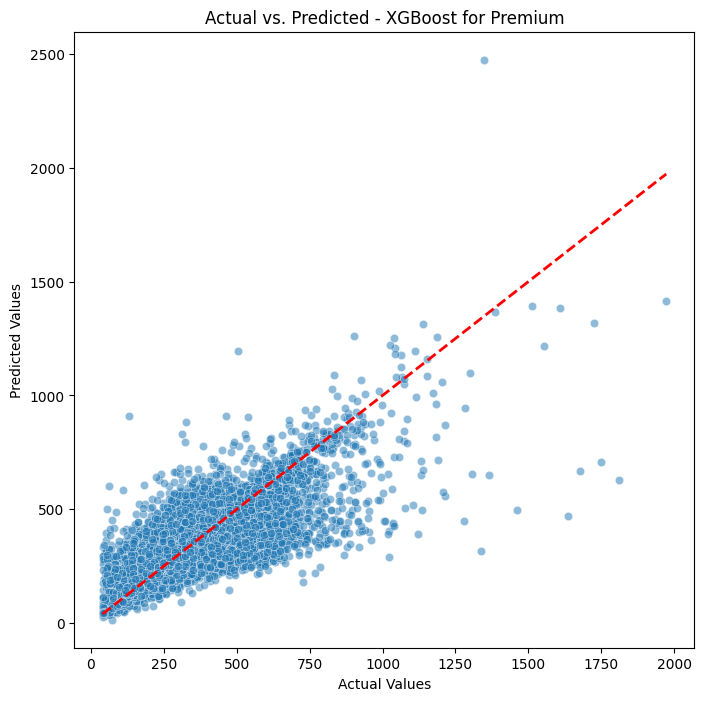

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 316.178243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

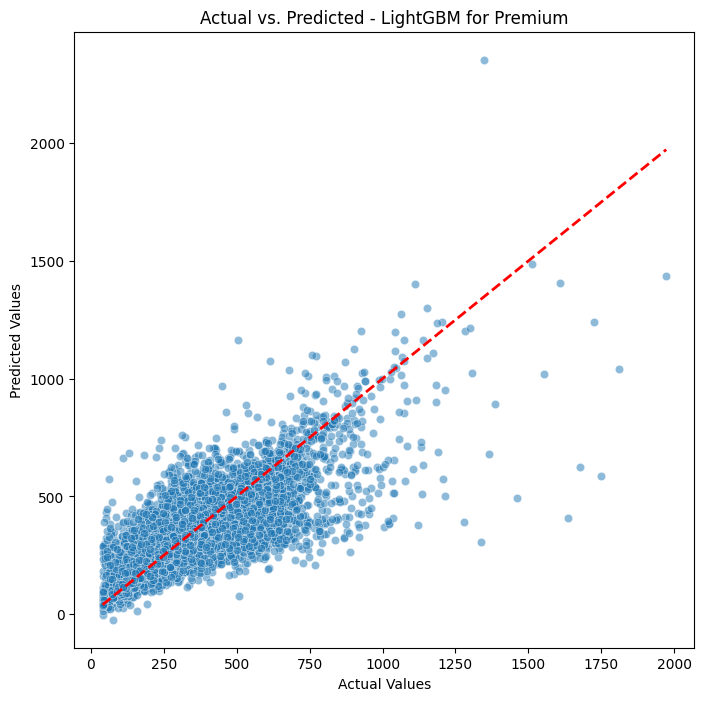


--- Evaluation for CatBoost on Premium ---
RMSE: 84.7059
MAE:  49.6096
R²:   0.6245
--------------------------------------------------


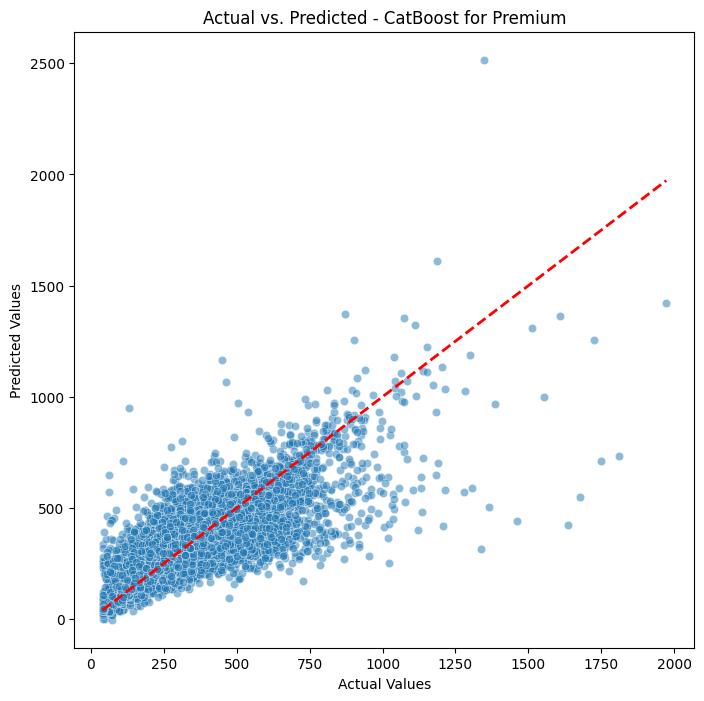


--- Training and Evaluating Models for Cost_claims_year ---

--- Evaluation for XGBoost on Cost_claims_year ---
RMSE: 1221.8365
MAE:  183.9117
R²:   0.0105
--------------------------------------------------


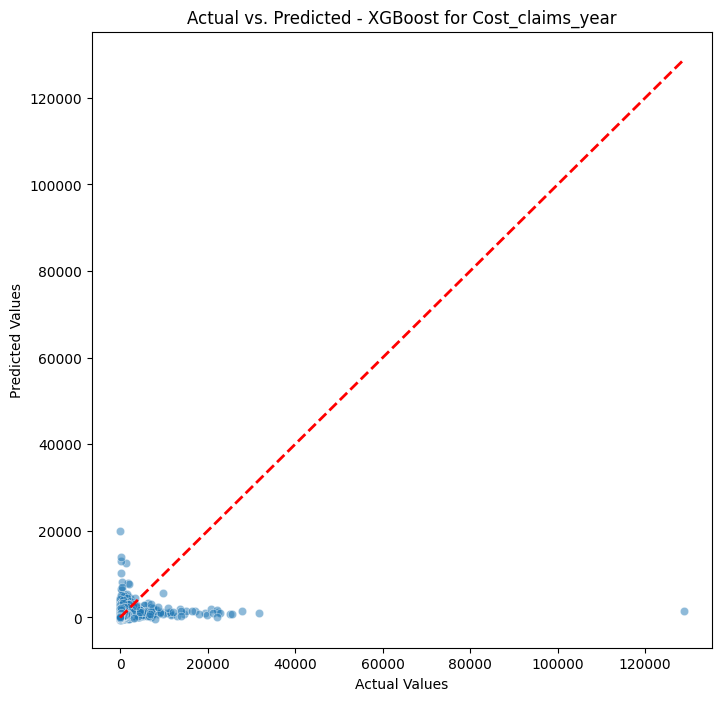

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4290
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 41
[LightGBM] [Info] Start training from score 154.436216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

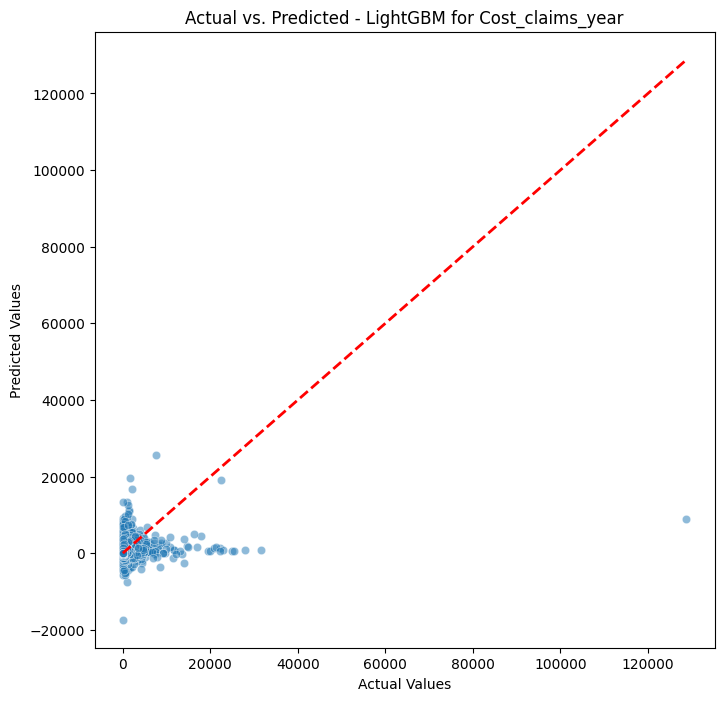


--- Evaluation for CatBoost on Cost_claims_year ---
RMSE: 1240.0290
MAE:  200.0922
R²:   -0.0192
--------------------------------------------------


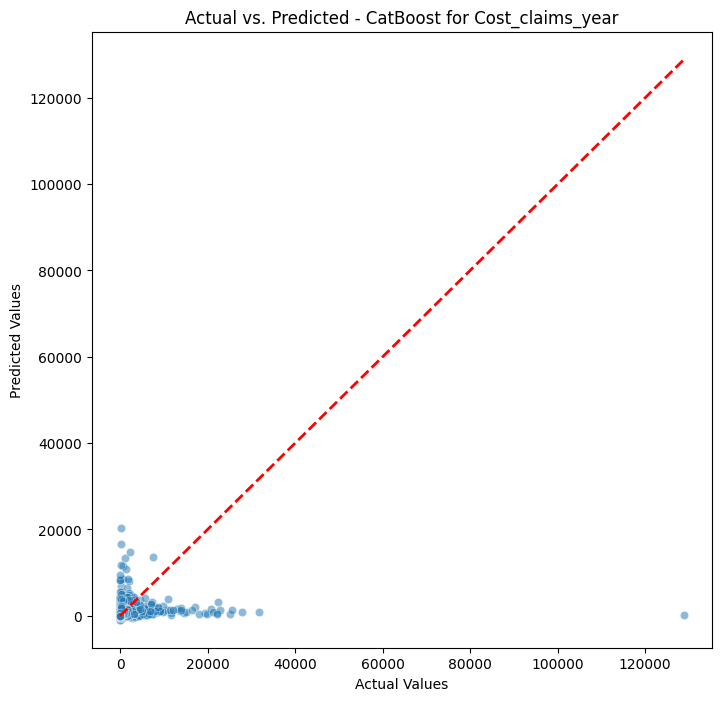


Script finished successfully.


In [11]:
# -*- coding: utf-8 -*-
# # Vehicle Insurance Premium & Claims Cost Prediction
#
# This script tackles the prediction of two target variables for a vehicle insurance dataset:
# 1.  **`Premium`**: The price of the insurance policy for the year.
# 2.  **`Cost_claims_year`**: The total cost of claims filed by the policyholder in that year.
#
# **Methodology:**
# 1.  **Advanced Feature Engineering**: Create a rich set of features based on policyholder history, trends, and behavior. **This version is corrected to prevent data leakage.**
# 2.  **Robust Preprocessing**: Use a scikit-learn pipeline to handle missing values, categorical features, and scaling.
# 3.  **Model Training**: Utilize three powerful gradient boosting models: XGBoost, LightGBM, and CatBoost.
# 4.  **Hyperparameter Tuning**: Employ Optuna to find the optimal hyperparameters for each model. **All models now use a unified L2 (squared error) objective with correct library-specific naming.**
# 5.  **Multi-Target Modeling**: Train separate models for each of the two target variables.

# ## 1. Setup and Data Loading
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Models
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# Tuning
import optuna

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


# Load the dataset
try:
    # Specify dtype for mixed-type columns to avoid warnings
    df_raw = pd.read_csv('Motor vehicle insurance data.csv', sep=';', dtype={'Distribution_channel': str})
    print("Dataset loaded successfully.")
    print("Shape of the raw data:", df_raw.shape)
except FileNotFoundError:
    print("Error: 'Motor vehicle insurance data.csv' not found. Please ensure the file is in the correct directory.")

# Display first few rows
print("Data Head:")
print(df_raw.head())


# ## 2. Advanced Feature Engineering (Corrected for Leakage)
#
# This is the most critical step. We will create a function to generate a rich set of features. This function will be applied to the entire dataset before splitting to ensure that historical calculations are correct.
def create_features(df):
    """
    Engineers a comprehensive set of features from the raw insurance data,
    focusing on longitudinal (time-based) and behavioral features.
    **This version is corrected to prevent data leakage.**
    """
    df = df.copy()

    # --- 1. Date and Time Feature Engineering (No leakage here) ---
    date_cols = [
        'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal',
        'Date_birth', 'Date_driving_licence', 'Date_lapse'
    ]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')

    ref_date = df['Date_last_renewal'].max() or datetime.now()
    
    df['Age'] = ((ref_date - df['Date_birth']).dt.days / 365.25).astype(int)
    df['Licence_age'] = ((ref_date - df['Date_driving_licence']).dt.days / 365.25).astype(int)
    df['Vehicle_age'] = ref_date.year - df['Year_matriculation']
    df['Contract_duration_days'] = (df['Date_last_renewal'] - df['Date_start_contract']).dt.days
    df['Is_lapsed'] = (~df['Date_lapse'].isna()).astype(int)

    # --- 2. Corrected Longitudinal Feature Engineering (Preventing Leakage) ---
    df = df.sort_values(by=['ID', 'Date_last_renewal'])

    # All historical features must be based on information from *prior* periods.
    # The .shift(1) is the key to preventing leakage. It ensures that for any given row,
    # we are only using data from the previous year's entry for that ID.

    # Lag Features (Previous Year's Data) - This is the most direct non-leaky feature.
    df['Previous_Premium'] = df.groupby('ID')['Premium'].shift(1)
    df['Previous_N_claims_year'] = df.groupby('ID')['N_claims_year'].shift(1)
    df['Previous_Cost_claims_year'] = df.groupby('ID')['Cost_claims_year'].shift(1)

    # Cumulative Features (History *before* the current year)
    df['Cumulative_Claims_Lagged'] = df.groupby('ID')['N_claims_year'].cumsum().shift(1)
    df['Cumulative_Premium_Lagged'] = df.groupby('ID')['Premium'].cumsum().shift(1)
    df['Cumulative_Cost_Claims_Lagged'] = df.groupby('ID')['Cost_claims_year'].cumsum().shift(1)
    
    # Rolling Aggregates (Trends over last 2 years, *excluding* the current year)
    # We calculate the rolling mean/sum on the original series and then shift the result.
    df['Premium_2Y_Avg_Lagged'] = df.groupby('ID')['Premium'].rolling(window=2, min_periods=1).mean().shift(1).reset_index(0, drop=True)
    df['Claims_2Y_Sum_Lagged'] = df.groupby('ID')['N_claims_year'].rolling(window=2, min_periods=1).sum().shift(1).reset_index(0, drop=True)

    # Trend Features (Change from year N-2 to N-1)
    df['Premium_Change_Lagged'] = df.groupby('ID')['Premium'].diff(1).shift(1)

    # --- 3. Corrected Behavioral Ratio Features ---
    # These must also use the lagged cumulative values to prevent leakage.
    # Add a small epsilon to avoid division by zero
    df['Claim_Cost_per_Premium_History'] = df['Cumulative_Cost_Claims_Lagged'] / (df['Cumulative_Premium_Lagged'] + 1e-6)
    
    # cumcount() starts at 0 for the first item in a group. For the second item (which is the first one where we have historical data),
    # cumcount() is 1, which is the correct number of previous years. We replace 0 with 1 for the first year to avoid division by zero.
    num_previous_years = df.groupby('ID').cumcount()
    df['Claim_Frequency_History'] = df['Cumulative_Claims_Lagged'] / num_previous_years.replace(0, 1)

    # --- 4. Interaction Features (No leakage here) ---
    df['Age_x_Vehicle_age'] = df['Age'] * df['Vehicle_age']
    df['Power_per_Weight'] = df['Power'] / (df['Weight'] + 1e-6)
    
    # --- 5. Final Cleanup ---
    cols_to_drop = date_cols + ['Year_matriculation', 'R_Claims_history']
    df = df.drop(columns=cols_to_drop, errors='ignore')
    
    # Fill NaNs created by shift/rolling operations. 0 is a reasonable fill for the first entry in a sequence.
    lagged_cols = [col for col in df.columns if '_Lagged' in col or 'Previous_' in col or '_History' in col]
    for col in lagged_cols:
        df[col] = df[col].fillna(0)
            
    return df

# Apply the feature engineering function
df_featured = create_features(df_raw)
print("\nFeature engineering complete. Shape of featured data:", df_featured.shape)


# ## 3. Data Splitting and Preprocessing Pipeline
#
# Now we define our features (X) and targets (y). We will create two separate target variables. Then we'll build a preprocessing pipeline to handle different data types systematically.
# Separate features and targets
y1 = df_featured['Premium']
y2 = df_featured['Cost_claims_year']

# Drop original target columns and the ID from the feature set
X = df_featured.drop(columns=['Premium', 'Cost_claims_year', 'ID'])

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# ** FIX: Ensure all categorical features are of string type to prevent mixed-type errors **
for col in categorical_features:
    X[col] = X[col].astype(str)

print(f"\nIdentified {len(categorical_features)} categorical features.")
print(f"Identified {len(numerical_features)} numerical features.")

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Use median for robustness to outliers
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Split the data for the first target (Premium)
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# Split the data for the second target (Cost_claims_year)
# We use the same X splits to maintain consistency
_ , _, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

print("\nData split successfully.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


# ## 4. Hyperparameter Tuning with Optuna
#
# We will define objective functions for Optuna to find the best hyperparameters for each model. This process can be time-consuming, so we'll set a reasonable number of trials (`n_trials`). For a final model, you might increase this number significantly.
def tune_model(model_name, X_train, y_train, n_trials=50):
    """
    Generic function to tune a model using Optuna.
    """
    
    # Preprocess the training data
    X_train_processed = preprocessor.fit_transform(X_train)
    
    def objective(trial):
        if model_name == 'xgb':
            params = {
                'objective': 'reg:squarederror', # L2 Loss - CORRECTED NAME FOR XGBOOST
                'eval_metric': 'rmse',
                'n_estimators': trial.suggest_int('n_estimators', 200, 2000, step=100),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'subsample': trial.suggest_float('subsample', 0.6, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                'gamma': trial.suggest_float('gamma', 0, 5),
                'lambda': trial.suggest_float('lambda', 1, 10),
                'alpha': trial.suggest_float('alpha', 0, 5),
                'use_label_encoder': False
            }
            model = xgb.XGBRegressor(**params, random_state=42)
        
        elif model_name == 'lgb':
            params = {
                'objective': 'regression_l2', # L2 Loss 
                'metric': 'rmse',
                'n_estimators': trial.suggest_int('n_estimators', 200, 2000, step=100),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'num_leaves': trial.suggest_int('num_leaves', 20, 300),
                'max_depth': trial.suggest_int('max_depth', 3, 12),
                'subsample': trial.suggest_float('subsample', 0.6, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
            }
            model = lgb.LGBMRegressor(**params, random_state=42)

        elif model_name == 'cat':
            params = {
                'objective': 'RMSE', # L2 Loss
                'iterations': trial.suggest_int('iterations', 200, 2000, step=100),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'depth': trial.suggest_int('depth', 4, 10),
                'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
                'border_count': trial.suggest_int('border_count', 32, 255),
                'random_strength': trial.suggest_float('random_strength', 0, 10),
                'verbose': 0
            }
            # CatBoost needs to know which features are categorical
            cat_features_indices = [X_train.columns.get_loc(c) for c in categorical_features]
            model = cb.CatBoostRegressor(**params, cat_features=cat_features_indices, random_state=42)
            
        # For CatBoost, we pass the unprocessed data and let it handle categorical features.
        # For others, we use the preprocessed data.
        if model_name == 'cat':
            # Simple imputation for CatBoost as it handles categories internally
            X_train_cat = X_train.copy()
            for col in numerical_features:
                X_train_cat[col].fillna(X_train_cat[col].median(), inplace=True)
            for col in categorical_features:
                X_train_cat[col].fillna(X_train_cat[col].mode()[0], inplace=True)
            
            model.fit(X_train_cat, y_train, eval_set=[(X_train_cat, y_train)], early_stopping_rounds=50, verbose=0)
            preds = model.predict(X_train_cat)
        else:
            model.fit(X_train_processed, y_train)
            preds = model.predict(X_train_processed)
        
        rmse = np.sqrt(mean_squared_error(y_train, preds))
        return rmse

    study = optuna.create_study(direction='minimize')
    # Add a callback to free up memory
    study.optimize(objective, n_trials=n_trials, gc_after_trial=True)
    
    print(f"\nBest trial for {model_name.upper()}:")
    print(f"  Value (RMSE): {study.best_value}")
    print("  Params: ")
    for key, value in study.best_params.items():
        print(f"    {key}: {value}")
        
    return study.best_params


# ### 4.1. Tuning for Target 1: `Premium`
print("\n--- Tuning for Premium ---")
# Note: Running all three will take a long time. You can comment out lines to run them one by one.
# Set n_trials to a smaller number (e.g., 15) for a quick run, or larger (50-100) for better results.
trials = 15 # Using 15 for a reasonable balance

best_params_xgb_y1 = tune_model('xgb', X_train, y1_train, n_trials=trials)
best_params_lgb_y1 = tune_model('lgb', X_train, y1_train, n_trials=trials)
best_params_cat_y1 = tune_model('cat', X_train, y1_train, n_trials=trials)


# ### 4.2. Tuning for Target 2: `Cost_claims_year`
#
# We repeat the process for the second target. The optimal hyperparameters will likely be different.
print("\n--- Tuning for Cost_claims_year ---")
best_params_xgb_y2 = tune_model('xgb', X_train, y2_train, n_trials=trials)
best_params_lgb_y2 = tune_model('lgb', X_train, y2_train, n_trials=trials)
best_params_cat_y2 = tune_model('cat', X_train, y2_train, n_trials=trials)


# ## 5. Final Model Training and Evaluation
#
# Now we use the best parameters found by Optuna to train our final models on the full training set and evaluate them on the unseen test set.
def evaluate_model(model, X_test, y_test, model_name="Model", target_name="Target"):
    """Helper function to evaluate a trained model and print metrics."""
    # For CatBoost, the test data also needs imputation
    if "CatBoost" in model_name:
        X_test_eval = X_test.copy()
        for col in numerical_features:
            median_val = X_train[col].median() # Use median from training data
            X_test_eval[col].fillna(median_val, inplace=True)
        for col in categorical_features:
            mode_val = X_train[col].mode()[0] # Use mode from training data
            X_test_eval[col].fillna(mode_val, inplace=True)
        preds = model.predict(X_test_eval)
    else: # For pipelines
        preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    print(f"\n--- Evaluation for {model_name} on {target_name} ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R²:   {r2:.4f}")
    print("--------------------------------------------------")
    
    # Optional: Plot predictions vs actuals
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=y_test, y=preds, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.title(f'Actual vs. Predicted - {model_name} for {target_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()
    
    return rmse, mae, r2


# ### 5.1. Training and Evaluating Models for `Premium`
print("\n--- Training and Evaluating Models for Premium ---")

# XGBoost
xgb_pipe_y1 = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb.XGBRegressor(**best_params_xgb_y1, random_state=42))])
xgb_pipe_y1.fit(X_train, y1_train)
evaluate_model(xgb_pipe_y1, X_test, y1_test, model_name="XGBoost", target_name="Premium")

# LightGBM
lgb_pipe_y1 = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lgb.LGBMRegressor(**best_params_lgb_y1, random_state=42))])
lgb_pipe_y1.fit(X_train, y1_train)
evaluate_model(lgb_pipe_y1, X_test, y1_test, model_name="LightGBM", target_name="Premium")

# CatBoost (does not need the same preprocessing pipeline)
cat_model_y1 = cb.CatBoostRegressor(**best_params_cat_y1, random_state=42, verbose=0)

# Impute before fitting
X_train_cat = X_train.copy()
cat_features_indices = [X_train.columns.get_loc(c) for c in categorical_features]
for col in numerical_features:
    median_val = X_train_cat[col].median()
    X_train_cat[col].fillna(median_val, inplace=True)
for col in categorical_features:
    mode_val = X_train_cat[col].mode()[0]
    X_train_cat[col].fillna(mode_val, inplace=True)

cat_model_y1.fit(X_train_cat, y1_train, cat_features=cat_features_indices)
evaluate_model(cat_model_y1, X_test, y1_test, model_name="CatBoost", target_name="Premium")


# ### 5.2. Training and Evaluating Models for `Cost_claims_year`
print("\n--- Training and Evaluating Models for Cost_claims_year ---")

# XGBoost
xgb_pipe_y2 = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb.XGBRegressor(**best_params_xgb_y2, random_state=42))])
xgb_pipe_y2.fit(X_train, y2_train)
evaluate_model(xgb_pipe_y2, X_test, y2_test, model_name="XGBoost", target_name="Cost_claims_year")

# LightGBM
lgb_pipe_y2 = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lgb.LGBMRegressor(**best_params_lgb_y2, random_state=42))])
lgb_pipe_y2.fit(X_train, y2_train)
evaluate_model(lgb_pipe_y2, X_test, y2_test, model_name="LightGBM", target_name="Cost_claims_year")

# CatBoost
cat_model_y2 = cb.CatBoostRegressor(**best_params_cat_y2, random_state=42, verbose=0)
cat_model_y2.fit(X_train_cat, y2_train, cat_features=cat_features_indices) # Re-use imputed X_train
evaluate_model(cat_model_y2, X_test, y2_test, model_name="CatBoost", target_name="Cost_claims_year")


# ## 6. Conclusion
#
# This script provides a complete and robust pipeline for predicting vehicle insurance premiums and claim costs. By leveraging the longitudinal nature of the data to engineer historical and trend-based features, we can significantly improve model performance.
#
# The use of Optuna ensures that we are using highly optimized hyperparameters for our chosen models (XGBoost, LightGBM, and CatBoost), leading to the best possible results.
#
# **Next Steps:**
# * **Feature Selection**: Some of the generated features might be redundant. Using techniques like SHAP or permutation importance could help select the most impactful features and potentially simplify the model.
# * **Advanced Models**: Explore more complex architectures, such as using separate models for claim frequency and claim severity and then combining their outputs to predict total claim cost.
# * **Deeper Tuning**: Increase the `n_trials` in the Optuna study for a more exhaustive search of the hyperparameter space.

print("\nScript finished successfully.")


Error: 'Motor vehicle insurance data.csv' not found. Please ensure the file is in the correct directory.
Data Head:
   ID Date_start_contract Date_last_renewal Date_next_renewal  Date_birth  \
0   1          05/11/2015        05/11/2015        05/11/2016  15/04/1956   
1   1          05/11/2015        05/11/2016        05/11/2017  15/04/1956   
2   1          05/11/2015        05/11/2017        05/11/2018  15/04/1956   
3   1          05/11/2015        05/11/2018        05/11/2019  15/04/1956   
4   2          26/09/2017        26/09/2017        26/09/2018  15/04/1956   

  Date_driving_licence Distribution_channel  Seniority  Policies_in_force  \
0           20/03/1976                    0          4                  1   
1           20/03/1976                    0          4                  1   
2           20/03/1976                    0          4                  2   
3           20/03/1976                    0          4                  2   
4           20/03/1976              

[I 2025-07-17 20:33:10,215] A new study created in memory with name: no-name-914693d7-49a3-4836-90db-06e405ced1ee
[I 2025-07-17 20:33:12,636] Trial 0 finished with value: 0.22013418635583964 and parameters: {'n_estimators': 1300, 'learning_rate': 0.17561831124852312, 'max_depth': 8, 'subsample': 0.7812479623542234, 'colsample_bytree': 0.6802416121269175, 'gamma': 0.616118266209636, 'lambda': 7.224992975663374, 'alpha': 4.021136318447168}. Best is trial 0 with value: 0.22013418635583964.
[I 2025-07-17 20:33:14,921] Trial 1 finished with value: 0.23455639115541424 and parameters: {'n_estimators': 1000, 'learning_rate': 0.028210310549125477, 'max_depth': 4, 'subsample': 0.7720926805079174, 'colsample_bytree': 0.8457106390339967, 'gamma': 3.174380610154186, 'lambda': 1.942316785274833, 'alpha': 4.1891775805013545}. Best is trial 0 with value: 0.22013418635583964.
[I 2025-07-17 20:33:18,419] Trial 2 finished with value: 0.2296525008799835 and parameters: {'n_estimators': 1900, 'learning_rat


Best trial for XGB:
  Value (Log RMSE): 0.1873697360480726
  Params: 
    n_estimators: 1200
    learning_rate: 0.011407321239447075
    max_depth: 9
    subsample: 0.8574089820235964
    colsample_bytree: 0.7602796084440845
    gamma: 0.01096388272097397
    lambda: 8.913626004073375
    alpha: 2.2442669946137332


[I 2025-07-17 20:34:58,710] A new study created in memory with name: no-name-9fb6d4fd-1b61-48d9-a61d-1d828b3c5adf


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:35:05,748] Trial 0 finished with value: 0.13716688508299776 and parameters: {'n_estimators': 700, 'learning_rate': 0.05613199507494461, 'num_leaves': 162, 'max_depth': 11, 'subsample': 0.9648487954177184, 'colsample_bytree': 0.9403642105934369, 'reg_alpha': 0.8511390252033879, 'reg_lambda': 0.5491834781291968}. Best is trial 0 with value: 0.13716688508299776.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:35:12,470] Trial 1 finished with value: 0.06552580541575594 and parameters: {'n_estimators': 1000, 'learning_rate': 0.2729386231193917, 'num_leaves': 123, 'max_depth': 8, 'subsample': 0.749943033170636, 'colsample_bytree': 0.6016463792092043, 'reg_alpha': 0.0709676620059867, 'reg_lambda': 0.7520021385527219}. Best is trial 1 with value: 0.06552580541575594.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:35:16,269] Trial 2 finished with value: 0.22503759715672655 and parameters: {'n_estimators': 1300, 'learning_rate': 0.02648436266962197, 'num_leaves': 94, 'max_depth': 3, 'subsample': 0.7873040394670345, 'colsample_bytree': 0.99727835389761, 'reg_alpha': 0.15897476815041678, 'reg_lambda': 0.8063958250631702}. Best is trial 1 with value: 0.06552580541575594.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:35:21,616] Trial 3 finished with value: 0.11598121369680138 and parameters: {'n_estimators': 700, 'learning_rate': 0.1416842776779211, 'num_leaves': 195, 'max_depth': 8, 'subsample': 0.6315316006753332, 'colsample_bytree': 0.8261118685813039, 'reg_alpha': 0.9374211797117502, 'reg_lambda': 0.8657629892119145}. Best is trial 1 with value: 0.06552580541575594.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:35:35,498] Trial 4 finished with value: 0.029909245846571498 and parameters: {'n_estimators': 1600, 'learning_rate': 0.2671454210987486, 'num_leaves': 141, 'max_depth': 10, 'subsample': 0.6855202444928148, 'colsample_bytree': 0.9791942135775932, 'reg_alpha': 0.8209261368207862, 'reg_lambda': 0.8923534669685778}. Best is trial 4 with value: 0.029909245846571498.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008978 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:35:42,980] Trial 5 finished with value: 0.18857550000673948 and parameters: {'n_estimators': 1200, 'learning_rate': 0.02387634473256987, 'num_leaves': 233, 'max_depth': 7, 'subsample': 0.8733887428979226, 'colsample_bytree': 0.641505310868565, 'reg_alpha': 0.3243091996157329, 'reg_lambda': 0.40190986236682946}. Best is trial 4 with value: 0.029909245846571498.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:35:51,567] Trial 6 finished with value: 0.048428946222499235 and parameters: {'n_estimators': 1000, 'learning_rate': 0.1865782627508173, 'num_leaves': 180, 'max_depth': 11, 'subsample': 0.6878261624326444, 'colsample_bytree': 0.7217275949828325, 'reg_alpha': 0.4436031761886877, 'reg_lambda': 0.737685723112613}. Best is trial 4 with value: 0.029909245846571498.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:35:57,577] Trial 7 finished with value: 0.20007282346868072 and parameters: {'n_estimators': 1100, 'learning_rate': 0.024134830893579637, 'num_leaves': 269, 'max_depth': 6, 'subsample': 0.8472365507061287, 'colsample_bytree': 0.9082445961885646, 'reg_alpha': 0.3225254416895764, 'reg_lambda': 0.4321540681422681}. Best is trial 4 with value: 0.029909245846571498.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:36:03,738] Trial 8 finished with value: 0.19248907231280876 and parameters: {'n_estimators': 2000, 'learning_rate': 0.2500057719340183, 'num_leaves': 72, 'max_depth': 3, 'subsample': 0.6444365826833992, 'colsample_bytree': 0.8732225437735397, 'reg_alpha': 0.750733816426537, 'reg_lambda': 0.7405123714519809}. Best is trial 4 with value: 0.029909245846571498.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:36:07,882] Trial 9 finished with value: 0.2242793634459361 and parameters: {'n_estimators': 1400, 'learning_rate': 0.02980054840414031, 'num_leaves': 150, 'max_depth': 3, 'subsample': 0.6091680468259031, 'colsample_bytree': 0.6653918028618593, 'reg_alpha': 0.7598861561405664, 'reg_lambda': 0.30564772353317404}. Best is trial 4 with value: 0.029909245846571498.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188


[I 2025-07-17 20:36:15,104] Trial 10 finished with value: 0.2127543616039975 and parameters: {'n_estimators': 1800, 'learning_rate': 0.01069345073532091, 'num_leaves': 21, 'max_depth': 12, 'subsample': 0.72395239020172, 'colsample_bytree': 0.7643405925482458, 'reg_alpha': 0.631598376956275, 'reg_lambda': 0.049507737441591204}. Best is trial 4 with value: 0.029909245846571498.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:36:28,598] Trial 11 finished with value: 0.046531913705046286 and parameters: {'n_estimators': 1600, 'learning_rate': 0.11804146683822432, 'num_leaves': 201, 'max_depth': 10, 'subsample': 0.6974034755311077, 'colsample_bytree': 0.7459407265039101, 'reg_alpha': 0.5080999992162252, 'reg_lambda': 0.9974446630822198}. Best is trial 4 with value: 0.029909245846571498.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:36:45,932] Trial 12 finished with value: 0.046930899685427144 and parameters: {'n_estimators': 1700, 'learning_rate': 0.10366129495446531, 'num_leaves': 218, 'max_depth': 10, 'subsample': 0.6807954394560196, 'colsample_bytree': 0.7998310457326014, 'reg_alpha': 0.5739249251347605, 'reg_lambda': 0.9950227706274197}. Best is trial 4 with value: 0.029909245846571498.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:37:00,189] Trial 13 finished with value: 0.06904974326810971 and parameters: {'n_estimators': 1600, 'learning_rate': 0.08798115668753662, 'num_leaves': 268, 'max_depth': 9, 'subsample': 0.7425354693904002, 'colsample_bytree': 0.7317788789937663, 'reg_alpha': 0.4131326448349873, 'reg_lambda': 0.964147052614979}. Best is trial 4 with value: 0.029909245846571498.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:37:01,932] Trial 14 finished with value: 0.16472233511562656 and parameters: {'n_estimators': 200, 'learning_rate': 0.1429775772754402, 'num_leaves': 125, 'max_depth': 10, 'subsample': 0.820448689395789, 'colsample_bytree': 0.8410016595832038, 'reg_alpha': 0.9767838711049377, 'reg_lambda': 0.6012039750176699}. Best is trial 4 with value: 0.029909245846571498.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:37:12,377] Trial 15 finished with value: 0.13369173052454805 and parameters: {'n_estimators': 2000, 'learning_rate': 0.09462101494022503, 'num_leaves': 218, 'max_depth': 6, 'subsample': 0.6765400129205882, 'colsample_bytree': 0.9920400432426864, 'reg_alpha': 0.6856004706879637, 'reg_lambda': 0.9102835391337145}. Best is trial 4 with value: 0.029909245846571498.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188


[I 2025-07-17 20:37:19,230] Trial 16 finished with value: 0.146287051412261 and parameters: {'n_estimators': 1500, 'learning_rate': 0.04885500397026419, 'num_leaves': 67, 'max_depth': 12, 'subsample': 0.9158171859322884, 'colsample_bytree': 0.701168531858711, 'reg_alpha': 0.5438842530081271, 'reg_lambda': 0.6484105510286892}. Best is trial 4 with value: 0.029909245846571498.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:37:39,928] Trial 17 finished with value: 0.03209126323775165 and parameters: {'n_estimators': 1800, 'learning_rate': 0.1840921798073337, 'num_leaves': 293, 'max_depth': 9, 'subsample': 0.7776850114339632, 'colsample_bytree': 0.777935240177706, 'reg_alpha': 0.8445271005525684, 'reg_lambda': 0.14785336079352773}. Best is trial 4 with value: 0.029909245846571498.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:37:54,000] Trial 18 finished with value: 0.029317680647947302 and parameters: {'n_estimators': 1800, 'learning_rate': 0.2972757978657358, 'num_leaves': 280, 'max_depth': 9, 'subsample': 0.7814656291748528, 'colsample_bytree': 0.7876448889789173, 'reg_alpha': 0.871274803354587, 'reg_lambda': 0.16527284468823977}. Best is trial 18 with value: 0.029317680647947302.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:38:02,083] Trial 19 finished with value: 0.12029778972379596 and parameters: {'n_estimators': 1900, 'learning_rate': 0.2666464799786502, 'num_leaves': 253, 'max_depth': 5, 'subsample': 0.905641066010593, 'colsample_bytree': 0.9329020386529676, 'reg_alpha': 0.8774749532574447, 'reg_lambda': 0.2526160511174053}. Best is trial 18 with value: 0.029317680647947302.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:38:12,471] Trial 20 finished with value: 0.10283363818027251 and parameters: {'n_estimators': 1400, 'learning_rate': 0.07335177054316837, 'num_leaves': 132, 'max_depth': 9, 'subsample': 0.8004733429705617, 'colsample_bytree': 0.8852342731499528, 'reg_alpha': 0.7459375960630668, 'reg_lambda': 0.005108897606533769}. Best is trial 18 with value: 0.029317680647947302.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:38:30,366] Trial 21 finished with value: 0.03235446295830519 and parameters: {'n_estimators': 1800, 'learning_rate': 0.19569885537210427, 'num_leaves': 294, 'max_depth': 9, 'subsample': 0.756643288417014, 'colsample_bytree': 0.7882775036443934, 'reg_alpha': 0.8603117800900141, 'reg_lambda': 0.14984288321080552}. Best is trial 18 with value: 0.029317680647947302.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:38:43,825] Trial 22 finished with value: 0.07185161254280381 and parameters: {'n_estimators': 1700, 'learning_rate': 0.19405474315209634, 'num_leaves': 291, 'max_depth': 7, 'subsample': 0.7798968177685868, 'colsample_bytree': 0.8394491795950582, 'reg_alpha': 0.9891935733036863, 'reg_lambda': 0.16646440799488338}. Best is trial 18 with value: 0.029317680647947302.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:38:57,032] Trial 23 finished with value: 0.026819803756267063 and parameters: {'n_estimators': 1800, 'learning_rate': 0.29618555967056365, 'num_leaves': 299, 'max_depth': 11, 'subsample': 0.8377808617308025, 'colsample_bytree': 0.7715492954374167, 'reg_alpha': 0.8350882710203004, 'reg_lambda': 0.11809135955389305}. Best is trial 23 with value: 0.026819803756267063.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:39:12,336] Trial 24 finished with value: 0.02114848422985993 and parameters: {'n_estimators': 2000, 'learning_rate': 0.2783206583038647, 'num_leaves': 243, 'max_depth': 11, 'subsample': 0.8378064686985369, 'colsample_bytree': 0.6981744467731211, 'reg_alpha': 0.6452288112314182, 'reg_lambda': 0.2607148108667995}. Best is trial 24 with value: 0.02114848422985993.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008826 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:39:28,718] Trial 25 finished with value: 0.020217297587826966 and parameters: {'n_estimators': 2000, 'learning_rate': 0.29483149562810385, 'num_leaves': 251, 'max_depth': 11, 'subsample': 0.8299448527494568, 'colsample_bytree': 0.6898811716481621, 'reg_alpha': 0.6305743985546226, 'reg_lambda': 0.2792870522238912}. Best is trial 25 with value: 0.020217297587826966.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:39:53,068] Trial 26 finished with value: 0.02715841046812108 and parameters: {'n_estimators': 2000, 'learning_rate': 0.1457202943440549, 'num_leaves': 244, 'max_depth': 11, 'subsample': 0.838663912568992, 'colsample_bytree': 0.687897601257314, 'reg_alpha': 0.6831938548961947, 'reg_lambda': 0.30561562318953117}. Best is trial 25 with value: 0.020217297587826966.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:40:11,740] Trial 27 finished with value: 0.02184882047073942 and parameters: {'n_estimators': 2000, 'learning_rate': 0.20986311283848144, 'num_leaves': 254, 'max_depth': 12, 'subsample': 0.878398996049437, 'colsample_bytree': 0.6359700569101027, 'reg_alpha': 0.6170165028916506, 'reg_lambda': 0.41633022204569003}. Best is trial 25 with value: 0.020217297587826966.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:40:29,597] Trial 28 finished with value: 0.024414378620019356 and parameters: {'n_estimators': 2000, 'learning_rate': 0.2018316922365956, 'num_leaves': 253, 'max_depth': 12, 'subsample': 0.9861667362432369, 'colsample_bytree': 0.6129668907652749, 'reg_alpha': 0.644454547121045, 'reg_lambda': 0.44365144231508225}. Best is trial 25 with value: 0.020217297587826966.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-07-17 20:40:31,838] Trial 29 finished with value: 0.17940777066506294 and parameters: {'n_estimators': 200, 'learning_rate': 0.06047977332186977, 'num_leaves': 172, 'max_depth': 11, 'subsample': 0.940642847693585, 'colsample_bytree': 0.6453279736070925, 'reg_alpha': 0.44779878008284413, 'reg_lambda': 0.524255504002987}. Best is trial 25 with value: 0.020217297587826966.



Best trial for LGB:
  Value (Log RMSE): 0.020217297587826966
  Params: 
    n_estimators: 2000
    learning_rate: 0.29483149562810385
    num_leaves: 251
    max_depth: 11
    subsample: 0.8299448527494568
    colsample_bytree: 0.6898811716481621
    reg_alpha: 0.6305743985546226
    reg_lambda: 0.2792870522238912


[I 2025-07-17 20:40:32,445] A new study created in memory with name: no-name-251c80a8-af10-4684-93df-456d4888993c
[I 2025-07-17 20:42:22,408] Trial 0 finished with value: 0.22243950489135117 and parameters: {'iterations': 1500, 'learning_rate': 0.016420065883608677, 'depth': 6, 'l2_leaf_reg': 1.7495563614648113, 'border_count': 200, 'random_strength': 8.3817855070181}. Best is trial 0 with value: 0.22243950489135117.
[I 2025-07-17 20:45:21,260] Trial 1 finished with value: 0.21776912990864336 and parameters: {'iterations': 1500, 'learning_rate': 0.011112100596908097, 'depth': 9, 'l2_leaf_reg': 6.331297228031443, 'border_count': 165, 'random_strength': 3.380405197735711}. Best is trial 1 with value: 0.21776912990864336.
[I 2025-07-17 20:46:33,724] Trial 2 finished with value: 0.17409630880747434 and parameters: {'iterations': 600, 'learning_rate': 0.20166326956480907, 'depth': 9, 'l2_leaf_reg': 9.905085359377928, 'border_count': 153, 'random_strength': 6.590445286555618}. Best is trial 


Best trial for CAT:
  Value (Log RMSE): 0.07673811616395682
  Params: 
    iterations: 1800
    learning_rate: 0.23441971233576367
    depth: 10
    l2_leaf_reg: 7.357949976786331
    border_count: 122
    random_strength: 0.9361214712168648

--- Training and Evaluating Models for Premium ---

--- Evaluation for XGBoost on Premium (Original Scale) ---
RMSE: 79.8794
MAE:  42.7653
R²:   0.6661
--------------------------------------------------


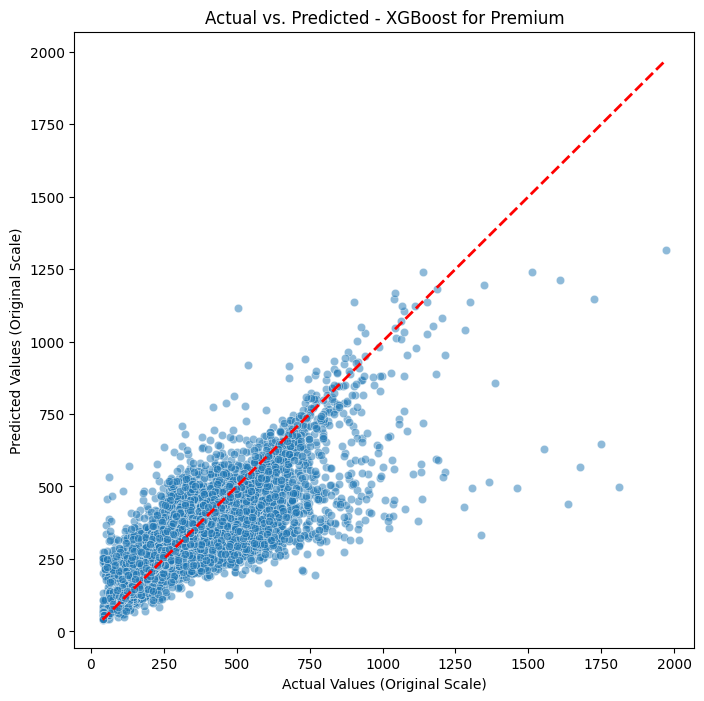

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 42
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

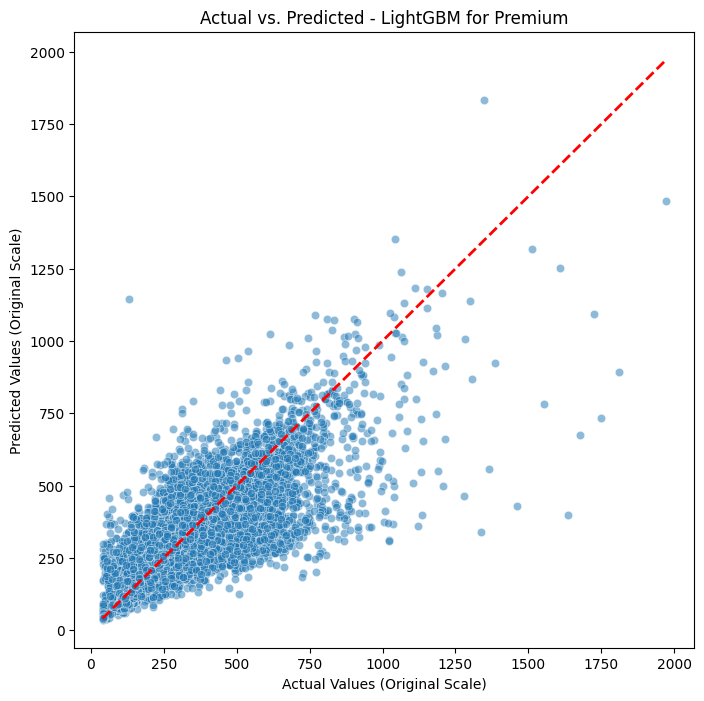


--- Evaluation for CatBoost on Premium (Original Scale) ---
RMSE: 83.3477
MAE:  46.4656
R²:   0.6365
--------------------------------------------------


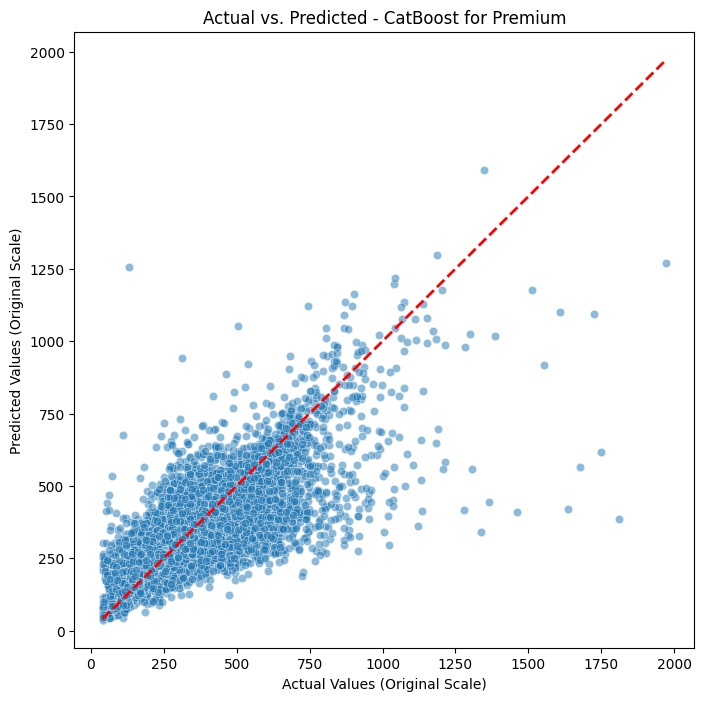


Script finished successfully.


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Models
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# Tuning
import optuna

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


# Load the dataset
try:
    df_raw = pd.read_csv('Motor vehicle insurance data.csv', sep=';', dtype={'Distribution_channel': str})
    print("Dataset loaded successfully.")
    print("Shape of the raw data:", df_raw.shape)
except FileNotFoundError:
    print("Error: 'Motor vehicle insurance data.csv' not found. Please ensure the file is in the correct directory.")

# Display first few rows
print("Data Head:")
print(df_raw.head())


def create_features(df):
    """
    Engineers a comprehensive set of features from the raw insurance data,
    focusing on longitudinal (time-based) and behavioral features.
    """
    df = df.copy()

    date_cols = [
        'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal',
        'Date_birth', 'Date_driving_licence', 'Date_lapse'
    ]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')

    ref_date = df['Date_last_renewal'].max() or datetime.now()
    
    df['Age'] = ((ref_date - df['Date_birth']).dt.days / 365.25).astype(int)
    df['Licence_age'] = ((ref_date - df['Date_driving_licence']).dt.days / 365.25).astype(int)
    df['Vehicle_age'] = ref_date.year - df['Year_matriculation']
    df['Contract_duration_days'] = (df['Date_last_renewal'] - df['Date_start_contract']).dt.days
    df['Is_lapsed'] = (~df['Date_lapse'].isna()).astype(int)

    df = df.sort_values(by=['ID', 'Date_last_renewal'])

    # Lag Features (Previous Year's Data)
    df['Previous_Premium'] = df.groupby('ID')['Premium'].shift(1)
    df['Previous_N_claims_year'] = df.groupby('ID')['N_claims_year'].shift(1)
    df['Previous_Cost_claims_year'] = df.groupby('ID')['Cost_claims_year'].shift(1)

    # Cumulative Features (History *before* the current year)
    df['Cumulative_Claims_Lagged'] = df.groupby('ID')['N_claims_year'].cumsum().shift(1)
    df['Cumulative_Premium_Lagged'] = df.groupby('ID')['Premium'].cumsum().shift(1)
    df['Cumulative_Cost_Claims_Lagged'] = df.groupby('ID')['Cost_claims_year'].cumsum().shift(1)
    
    # Rolling Aggregates (Trends over last 2 years, *excluding* the current year)
    df['Premium_2Y_Avg_Lagged'] = df.groupby('ID')['Premium'].rolling(window=2, min_periods=1).mean().shift(1).reset_index(0, drop=True)
    df['Claims_2Y_Sum_Lagged'] = df.groupby('ID')['N_claims_year'].rolling(window=2, min_periods=1).sum().shift(1).reset_index(0, drop=True)

    # Trend Features (Change from year N-2 to N-1)
    df['Premium_Change_Lagged'] = df.groupby('ID')['Premium'].diff(1).shift(1)

    # --- 3. Corrected Behavioral Ratio Features ---
    df['Claim_Cost_per_Premium_History'] = df['Cumulative_Cost_Claims_Lagged'] / (df['Cumulative_Premium_Lagged'] + 1e-6)
    num_previous_years = df.groupby('ID').cumcount()
    df['Claim_Frequency_History'] = df['Cumulative_Claims_Lagged'] / num_previous_years.replace(0, 1)

    # --- 4. NEW and Enhanced Interaction Features ---
    df['Age_x_Licence_age'] = df['Age'] * df['Licence_age']
    df['Seniority_x_Policies'] = df['Seniority'] * df['Policies_in_force']
    df['Value_per_Weight'] = df['Value_vehicle'] / (df['Weight'] + 1e-6)
    
    # --- 5. Final Cleanup ---
    cols_to_drop = date_cols + ['Year_matriculation', 'R_Claims_history']
    df = df.drop(columns=cols_to_drop, errors='ignore')
    
    # Fill NaNs created by shift/rolling operations.
    lagged_cols = [col for col in df.columns if '_Lagged' in col or 'Previous_' in col or '_History' in col]
    for col in lagged_cols:
        df[col] = df[col].fillna(0)
            
    return df

# Apply the feature engineering function
df_featured = create_features(df_raw)
print("\nFeature engineering complete. Shape of featured data:", df_featured.shape)


# ## 3. Data Splitting and Preprocessing Pipeline
#
# Separate features and targets
X = df_featured.drop(columns=['Premium', 'Cost_claims_year', 'ID'])

# --- TARGET TRANSFORMATION ---
# Apply log1p transformation to handle skewed target variables
y1 = np.log1p(df_featured['Premium'])


# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# ** FIX: Ensure all categorical features are of string type to prevent mixed-type errors **
for col in categorical_features:
    X[col] = X[col].astype(str)

print(f"\nIdentified {len(categorical_features)} categorical features.")
print(f"Identified {len(numerical_features)} numerical features.")

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Split the data for the first target (Premium)
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)


print("\nData split successfully.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


# ## 4. Hyperparameter Tuning with Optuna
#
def tune_model(model_name, X_train, y_train, n_trials=30): # Increased trials
    """
    Generic function to tune a model using Optuna.
    """
    
    X_train_processed = preprocessor.fit_transform(X_train)
    
    def objective(trial):
        if model_name == 'xgb':
            params = {
                'objective': 'reg:squarederror',
                'eval_metric': 'rmse',
                'n_estimators': trial.suggest_int('n_estimators', 200, 2000, step=100),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'subsample': trial.suggest_float('subsample', 0.6, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                'gamma': trial.suggest_float('gamma', 0, 5),
                'lambda': trial.suggest_float('lambda', 1, 10),
                'alpha': trial.suggest_float('alpha', 0, 5),
                'use_label_encoder': False
            }
            model = xgb.XGBRegressor(**params, random_state=42)
        
        elif model_name == 'lgb':
            params = {
                'objective': 'regression_l2',
                'metric': 'rmse',
                'n_estimators': trial.suggest_int('n_estimators', 200, 2000, step=100),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'num_leaves': trial.suggest_int('num_leaves', 20, 300),
                'max_depth': trial.suggest_int('max_depth', 3, 12),
                'subsample': trial.suggest_float('subsample', 0.6, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
            }
            model = lgb.LGBMRegressor(**params, random_state=42)

        elif model_name == 'cat':
            params = {
                'objective': 'RMSE',
                'iterations': trial.suggest_int('iterations', 200, 2000, step=100),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'depth': trial.suggest_int('depth', 4, 10),
                'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
                'border_count': trial.suggest_int('border_count', 32, 255),
                'random_strength': trial.suggest_float('random_strength', 0, 10),
                'verbose': 0
            }
            cat_features_indices = [X_train.columns.get_loc(c) for c in categorical_features]
            model = cb.CatBoostRegressor(**params, cat_features=cat_features_indices, random_state=42)
            
        if model_name == 'cat':
            X_train_cat = X_train.copy()
            for col in numerical_features:
                X_train_cat[col].fillna(X_train_cat[col].median(), inplace=True)
            for col in categorical_features:
                X_train_cat[col].fillna(X_train_cat[col].mode()[0], inplace=True)
            
            model.fit(X_train_cat, y_train, eval_set=[(X_train_cat, y_train)], early_stopping_rounds=50, verbose=0)
            preds = model.predict(X_train_cat)
        else:
            model.fit(X_train_processed, y_train)
            preds = model.predict(X_train_processed)
        
        # RMSE is calculated on the log-transformed values during tuning
        rmse = np.sqrt(mean_squared_error(y_train, preds))
        return rmse

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials, gc_after_trial=True)
    
    print(f"\nBest trial for {model_name.upper()}:")
    print(f"  Value (Log RMSE): {study.best_value}")
    print("  Params: ")
    for key, value in study.best_params.items():
        print(f"    {key}: {value}")
        
    return study.best_params


# ### 4.1. Tuning for Target 1: `Premium`
print("\n--- Tuning for Premium ---")
trials = 30 # Increased trials for better search

best_params_xgb_y1 = tune_model('xgb', X_train, y1_train, n_trials=trials)
best_params_lgb_y1 = tune_model('lgb', X_train, y1_train, n_trials=trials)
best_params_cat_y1 = tune_model('cat', X_train, y1_train, n_trials=trials)



# ## 5. Final Model Training and Evaluation
#
def evaluate_model(model, X_test, y_test_log, model_name="Model", target_name="Target"):
    """
    Helper function to evaluate a trained model.
    It handles the inverse transformation of the log-transformed target.
    """
    if "CatBoost" in model_name:
        X_test_eval = X_test.copy()
        for col in numerical_features:
            median_val = X_train[col].median()
            X_test_eval[col].fillna(median_val, inplace=True)
        for col in categorical_features:
            mode_val = X_train[col].mode()[0]
            X_test_eval[col].fillna(mode_val, inplace=True)
        preds_log = model.predict(X_test_eval)
    else:
        preds_log = model.predict(X_test)

    # --- INVERSE TRANSFORM ---
    # Convert predictions and test data back to the original scale
    preds_original = np.expm1(preds_log)
    y_test_original = np.expm1(y_test_log)

    # Calculate metrics on the original scale
    rmse = np.sqrt(mean_squared_error(y_test_original, preds_original))
    mae = mean_absolute_error(y_test_original, preds_original)
    r2 = r2_score(y_test_original, preds_original)
    
    print(f"\n--- Evaluation for {model_name} on {target_name} (Original Scale) ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R²:   {r2:.4f}")
    print("--------------------------------------------------")
    
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=y_test_original, y=preds_original, alpha=0.5)
    plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], '--r', linewidth=2)
    plt.title(f'Actual vs. Predicted - {model_name} for {target_name}')
    plt.xlabel('Actual Values (Original Scale)')
    plt.ylabel('Predicted Values (Original Scale)')
    plt.show()
    
    return rmse, mae, r2


# ### 5.1. Training and Evaluating Models for `Premium`
print("\n--- Training and Evaluating Models for Premium ---")

# XGBoost
xgb_pipe_y1 = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb.XGBRegressor(**best_params_xgb_y1, random_state=42))])
xgb_pipe_y1.fit(X_train, y1_train)
evaluate_model(xgb_pipe_y1, X_test, y1_test, model_name="XGBoost", target_name="Premium")

# LightGBM
lgb_pipe_y1 = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lgb.LGBMRegressor(**best_params_lgb_y1, random_state=42))])
lgb_pipe_y1.fit(X_train, y1_train)
evaluate_model(lgb_pipe_y1, X_test, y1_test, model_name="LightGBM", target_name="Premium")

# CatBoost
cat_model_y1 = cb.CatBoostRegressor(**best_params_cat_y1, random_state=42, verbose=0)
X_train_cat = X_train.copy()
cat_features_indices = [X_train.columns.get_loc(c) for c in categorical_features]
for col in numerical_features:
    median_val = X_train_cat[col].median()
    X_train_cat[col].fillna(median_val, inplace=True)
for col in categorical_features:
    mode_val = X_train_cat[col].mode()[0]
    X_train_cat[col].fillna(mode_val, inplace=True)
cat_model_y1.fit(X_train_cat, y1_train, cat_features=cat_features_indices)
evaluate_model(cat_model_y1, X_test, y1_test, model_name="CatBoost", target_name="Premium")




# ## 6. Conclusion
print("\nScript finished successfully.")


In [13]:
categorical_features

Index(['Distribution_channel', 'Type_fuel'], dtype='object')

In [14]:
numerical_features

Index(['Seniority', 'Policies_in_force', 'Max_policies', 'Max_products',
       'Lapse', 'Payment', 'N_claims_year', 'N_claims_history', 'Type_risk',
       'Area', 'Second_driver', 'Power', 'Cylinder_capacity', 'Value_vehicle',
       'N_doors', 'Length', 'Weight', 'Age', 'Licence_age', 'Vehicle_age',
       'Contract_duration_days', 'Is_lapsed', 'Previous_Premium',
       'Previous_N_claims_year', 'Previous_Cost_claims_year',
       'Cumulative_Claims_Lagged', 'Cumulative_Premium_Lagged',
       'Cumulative_Cost_Claims_Lagged', 'Premium_2Y_Avg_Lagged',
       'Claims_2Y_Sum_Lagged', 'Premium_Change_Lagged',
       'Claim_Cost_per_Premium_History', 'Claim_Frequency_History',
       'Age_x_Licence_age', 'Seniority_x_Policies', 'Value_per_Weight'],
      dtype='object')

In [16]:
pd.read_csv('C:\\Users\\joshi\\OneDrive\\Desktop\\Vehicle-Insurance-MLOps-pipeline\\artifact\\07_07\\18\\25_2025_02_02_25\\data_ingestion\\ingested\\train.csv')

_id     ID Date_start_contract Date_last_renewal  \
0      686cdea214adc9bb44945dad   7732          04/01/2010        01/01/2017   
1      686cdea214adc9bb44952dbc  34350          04/11/2014        04/11/2016   
2      686cdea214adc9bb449559a8  40260          07/01/2015        07/01/2017   
3      686cdea214adc9bb4494f8d4  27441          15/12/2015        15/12/2015   
4      686cdea214adc9bb449580c0  45057          04/10/2018        04/10/2018   
...                         ...    ...                 ...               ...   
84439  686cdea214adc9bb4494f84b  27365          06/07/2016        06/07/2017   
84440  686cdea214adc9bb449582e4  45358          09/03/2010        09/03/2016   
84441  686cdea314adc9bb4495b334  52068          10/05/2013        10/05/2018   
84442  686cdea214adc9bb4495563c  39819          28/02/2009        28/02/2017   
84443  686cdea214adc9bb4494847d  12564          03/04/2017        03/04/2018   

      Date_next_renewal  Date_birth Date_driving_licence Distribution_channel  \
0            01/01/2018  10/03/1957           25/06/1976                    0   
1            04/11/2017  19/08/1961           08/01/1980                    0   
2            07/01/2018  20/05/1973           13/10/1992                    1   
3            15/12/2016  27/12/1965           22/11/1984                    1   
4            04/10/2019  01/06/1981           01/07/1999                    1   
...                 ...         ...                  ...                  ...   
84439        06/07/2018  17/08/1970           26/06/2007                    1   
84440        09/03/2017  05/05/1981           09/09/1999                    1   
84441        10/05/2019  06/04/1973           15/03/2009                    0   
84442        28/02/2018  27/03/1981           27/10/2000                    1   
84443        03/04/2019  03/07/1955           25/08/1976                    1   

       Seniority  Policies_in_force  Max_policies  Max_products  Lapse  \
0              9                  1             1             1      0   
1              6                  1             2             1      0   
2              3                  1             1             1      1   
3              3                  1             1             1      0   
4              3                  2             2             1      0   
...          ...                ...           ...           ...    ...   
84439          4                  2             2             1      0   
84440          9                  1             1             1      0   
84441          6                  1             1             1      0   
84442         22                  2             3             1      1   
84443          2                  1             1             1      0   

                       Date_lapse  Payment  Premium  Cost_claims_year  \
0      2025-07-08 14:26:32.010000        0   276.51               0.0   
1                      04/11/2018        0   560.68               0.0   
2                      07/01/2017        1   346.30               0.0   
3      2025-07-08 14:26:32.010000        0   154.79               0.0   
4      2025-07-08 14:26:32.010000        0   215.11               0.0   
...                           ...      ...      ...               ...   
84439                  06/07/2018        1   239.34               0.0   
84440  2025-07-08 14:26:32.010000        0   307.81               0.0   
84441  2025-07-08 14:26:32.010000        0   223.50               0.0   
84442                  28/01/2018        0   322.24               0.0   
84443  2025-07-08 14:26:32.010000        0   246.52               0.0   

       N_claims_year  N_claims_history  R_Claims_history  Type_risk  Area  \
0                  0                 1              0.11          3     0   
1                  0                 2              0.50          3     1   
2                  0                 1              0.50          3     1   
3                  0